In [1]:
from os import listdir
from os.path import isfile, join
import zipfile
import json

files = [f for f in listdir("nvds/") if isfile(join("nvds/", f))]
files.sort()
cve_dict_list=[]
filename_list=[]
for file in files:
    print(file)
    filename_list.append(file[11:15])
    archive = zipfile.ZipFile(join("nvds/", file), 'r')
    jsonfile = archive.open(archive.namelist()[0])
    cve_dict_list.append(json.loads(jsonfile.read()))
    jsonfile.close()

nvdcve-1.0-2002.json.zip
nvdcve-1.0-2003.json.zip
nvdcve-1.0-2004.json.zip
nvdcve-1.0-2005.json.zip
nvdcve-1.0-2006.json.zip
nvdcve-1.0-2007.json.zip
nvdcve-1.0-2008.json.zip
nvdcve-1.0-2009.json.zip
nvdcve-1.0-2010.json.zip
nvdcve-1.0-2011.json.zip
nvdcve-1.0-2012.json.zip
nvdcve-1.0-2013.json.zip
nvdcve-1.0-2014.json.zip
nvdcve-1.0-2015.json.zip
nvdcve-1.0-2016.json.zip
nvdcve-1.0-2017.json.zip
nvdcve-1.0-2018.json.zip
nvdcve-1.0-2019.json.zip


In [2]:
filename_list

['2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [3]:
print("CVE_data_timestamp: " + str(cve_dict_list[0]['CVE_data_timestamp']))
print("CVE_data_version: " + str(cve_dict_list[0]['CVE_data_version']))
print("CVE_data_format: " + str(cve_dict_list[0]['CVE_data_format']))
print("CVE_data_numberOfCVEs: " + str(cve_dict_list[0]['CVE_data_numberOfCVEs']))
print("CVE_data_type: " + str(cve_dict_list[0]['CVE_data_type']))

CVE_data_timestamp: 2019-05-16T08:47Z
CVE_data_version: 4.0
CVE_data_format: MITRE
CVE_data_numberOfCVEs: 6745
CVE_data_type: CVE


In [4]:
with_cpe=[]
without_cpe=[]
all_cpe=[]
for cve_dict in cve_dict_list:
    cpe_num=0
    cpe_all_num=0
    for CVE_Item in cve_dict['CVE_Items']:
        if(len(CVE_Item['configurations']['nodes'])!=0 and CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1):
            # print(CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1)
            cpe_num=cpe_num+1
        if(CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1):
            cpe_all_num=cpe_all_num+1
#         if(len(CVE_Item['configurations']['nodes'])==0):
#             print(CVE_Item)
#             print()
#             print(CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1)
#             break
    with_cpe.append(cpe_num)
    without_cpe.append(cpe_all_num-cpe_num)
    all_cpe.append(cpe_all_num)

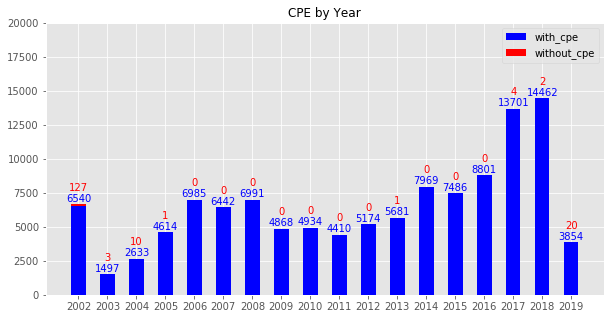

In [74]:
import numpy as np
import matplotlib.pyplot as plt

x = filename_list
a = with_cpe
b = without_cpe
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title('CPE by Year',fontsize='large')
plt.bar(x, a, width=0.5,label='with_cpe',color='blue')
plt.bar(x, b, bottom=a, width=0.5,label='without_cpe',color='red')

num=0
for x,y in enumerate(a):
    plt.text(x,all_cpe[num]+200,'%s' %round(y,1),ha='center',color='blue')
    num=num+1
num=0
for x,y in enumerate(b):
    plt.text(x,all_cpe[num]+1000,'%s' %round(y,1),ha='center',color='red')
    num=num+1
# for x,y in enumerate(b):
#     plt.text(x,y+100,'%s' %round(y,1),ha='center')

plt.ylim(0,20000)
plt.legend()
plt.show()


In [6]:
only_cvss_v2=[]
cvss_v2_and_cvss_v3=[]
no_cvss=[]
all_cvss=[]
for cve_dict in cve_dict_list:
    only_cvss_v2_num=0
    cvss_v2_and_cvss_v3_num=0
    no_cvss_num=0
    cvss_all_num=0
    for CVE_Item in cve_dict['CVE_Items']:
        if(CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1):
            cpe_all_num=cpe_all_num+1
            if('baseMetricV3' in CVE_Item['impact'] and 'baseMetricV2' in CVE_Item['impact']):
                cvss_v2_and_cvss_v3_num=cvss_v2_and_cvss_v3_num+1
            if('baseMetricV3' not in CVE_Item['impact'] and 'baseMetricV2' in CVE_Item['impact']):
                only_cvss_v2_num=only_cvss_v2_num+1
            if(len(CVE_Item['impact'])==0):
                no_cvss_num=no_cvss_num+1
        else:
            pass
    only_cvss_v2.append(only_cvss_v2_num)
    cvss_v2_and_cvss_v3.append(cvss_v2_and_cvss_v3_num)
    no_cvss.append(no_cvss_num)
    all_cvss.append(cvss_all_num)

In [7]:
cvss_v2_and_cvss_v3


[2, 2, 3, 3, 5, 6, 6, 15, 21, 40, 64, 107, 694, 2053, 8595, 13701, 14462, 3854]

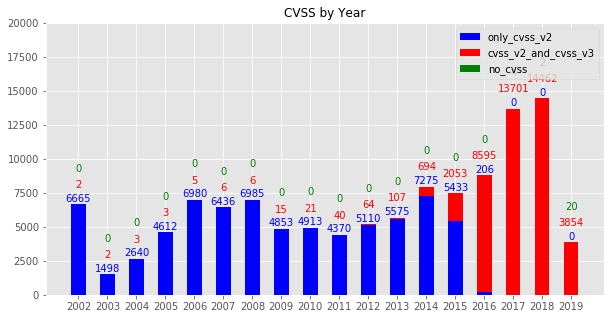

In [76]:
import numpy as np
import matplotlib.pyplot as plt



x = filename_list
a = only_cvss_v2
b = cvss_v2_and_cvss_v3
c = no_cvss

plt.figure(figsize=(10,5))
plt.title('CVSS by Year',fontsize='large')
# plt.title('',fontsize='large')
plt.bar(x, a, width=0.5,label='only_cvss_v2',color='blue')
plt.bar(x, b, bottom=a, width=0.5,label='cvss_v2_and_cvss_v3',color='red')
plt.bar(x, c, bottom=b, width=0.5,label='no_cvss',color='green')

num=0
for x,y in enumerate(a):
    plt.text(x,all_cpe[num]+200,'%s' %round(y,1),ha='center',color='blue')
    num=num+1
num=0
for x,y in enumerate(b):
    plt.text(x,all_cpe[num]+1200,'%s' %round(y,1),ha='center',color='red')
    num=num+1
num=0
for x,y in enumerate(c):
    plt.text(x,all_cpe[num]+2400,'%s' %round(y,1),ha='center',color='green')
    num=num+1
# for x,y in enumerate(b):
#     plt.text(x,y+100,'%s' %round(y,1),ha='center')

plt.ylim(0,20000)
plt.legend()
plt.show()


In [9]:
cvss_low_num_list=[]
cvss_medium_num_list=[]
cvss_high_num_list=[]
for cve_dict in cve_dict_list:
    cvss_low_num=0
    cvss_medium_num=0
    cvss_high_num=0
    for CVE_Item in cve_dict['CVE_Items']:
        if(CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1):
            cpe_all_num=cpe_all_num+1
            if('baseMetricV2' in CVE_Item['impact']):
                if(CVE_Item['impact']['baseMetricV2']['severity']=='HIGH'):
                    cvss_high_num=cvss_high_num+1
                elif(CVE_Item['impact']['baseMetricV2']['severity']=='MEDIUM'):
                    cvss_medium_num=cvss_medium_num+1
                elif(CVE_Item['impact']['baseMetricV2']['severity']=='LOW'):
                    cvss_low_num=cvss_low_num+1
    cvss_low_num_list.append(cvss_low_num)
    cvss_medium_num_list.append(cvss_medium_num)
    cvss_high_num_list.append(cvss_high_num)
    all_cvss.append(cvss_all_num)

In [10]:
cvss_medium_num_list

[2892,
 712,
 1335,
 2337,
 3511,
 3098,
 3274,
 2420,
 2455,
 2340,
 2923,
 3227,
 5245,
 4008,
 4786,
 8305,
 9483,
 2503]

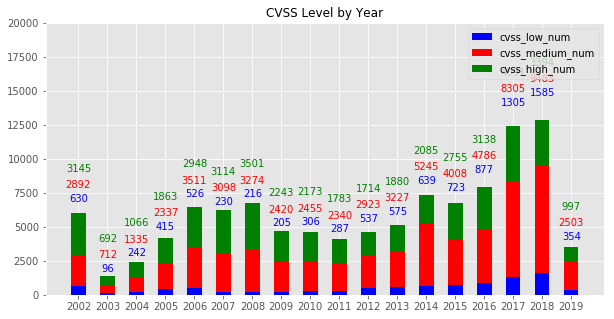

In [77]:
import numpy as np
import matplotlib.pyplot as plt



x = filename_list
a = cvss_low_num_list
b = cvss_medium_num_list
c = cvss_high_num_list

plt.figure(figsize=(10,5))
plt.title('CVSS Level by Year',fontsize='large')
plt.bar(x, a, width=0.5,label='cvss_low_num',color='blue')
plt.bar(x, b, bottom=a, width=0.5,label='cvss_medium_num',color='red')
plt.bar(x, c, bottom=b, width=0.5,label='cvss_high_num',color='green')

num=0
for x,y in enumerate(a):
    plt.text(x,all_cpe[num]+200,'%s' %round(y,1),ha='center',color='blue')
    num=num+1
num=0
for x,y in enumerate(b):
    plt.text(x,all_cpe[num]+1200,'%s' %round(y,1),ha='center',color='red')
    num=num+1
num=0
for x,y in enumerate(c):
    plt.text(x,all_cpe[num]+2400,'%s' %round(y,1),ha='center',color='green')
    num=num+1
# for x,y in enumerate(b):
#     plt.text(x,y+100,'%s' %round(y,1),ha='center')

plt.ylim(0,20000)
plt.legend()
plt.show()


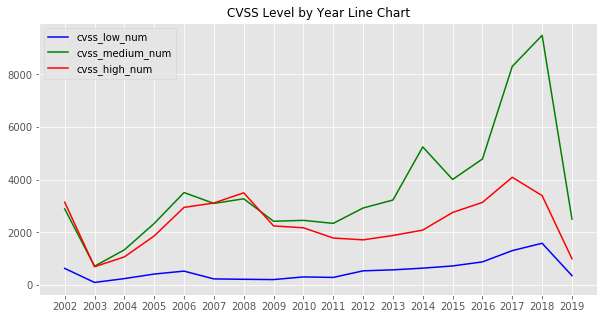

In [78]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title('CVSS Level by Year Line Chart',fontsize='large')

plt.plot_date(filename_list,cvss_low_num_list,'-',label='cvss_low_num',color='blue')
plt.plot_date(filename_list,cvss_medium_num_list,'-',label='cvss_medium_num',color='green')
plt.plot_date(filename_list,cvss_high_num_list,'-',label='cvss_high_num',color='red')

plt.legend()
plt.grid(True)

In [13]:
import operator

vendor_year_list=[]
all_vendor_year_list=[]
for cve_dict in cve_dict_list:
    vendor_dict={}
    for CVE_Item in cve_dict['CVE_Items']:
        if(CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1):
            cpe_all_num=cpe_all_num+1
            vendor_list=CVE_Item['cve']['affects']['vendor']['vendor_data']
            for vendor in vendor_list:
                if(vendor['vendor_name'] in vendor_dict):
                    vendor_dict[vendor['vendor_name']]=vendor_dict[vendor['vendor_name']]+1
                else:
                    vendor_dict[vendor['vendor_name']]=1
    vendor_dict=sorted(vendor_dict.items(), key=operator.itemgetter(1),reverse=True)
    vendor_year_list.append(vendor_dict[:1])
    all_vendor_year_list.append(vendor_dict)

In [14]:
len(vendor_year_list)

18

In [15]:
vendor_year_list

[[('microsoft', 806)],
 [('microsoft', 129)],
 [('microsoft', 127)],
 [('microsoft', 147)],
 [('microsoft', 284)],
 [('microsoft', 254)],
 [('microsoft', 240)],
 [('microsoft', 224)],
 [('microsoft', 323)],
 [('google', 426)],
 [('oracle', 391)],
 [('oracle', 523)],
 [('oracle', 484)],
 [('apple', 673)],
 [('oracle', 826)],
 [('google', 1055)],
 [('debian', 1100)],
 [('microsoft', 346)]]

In [16]:
top_n_vendors_list=[]
for i in vendor_year_list:
    # temp_year_vendor_list=[x for x,y in i]
    for x,y in i:
        if(x not in top_n_vendors_list):
            top_n_vendors_list.append(x)
top_n_vendors_list

['microsoft', 'google', 'oracle', 'apple', 'debian']

In [17]:
top_n_vendors_dict={}
for i in top_n_vendors_list:
    top_n_vendors_dict[i]=[]
year_num=0
for i in vendor_year_list:
    temp_year_vendor_list=[x for x,y in i]
    #print(top_10_vendors_list)
    #count =0
    for j in top_n_vendors_list:
        if(j in temp_year_vendor_list):
            top_n_vendors_dict[j].append([y for x,y in i if(x==j)][0])
        else:
            if(len([y for x,y in all_vendor_year_list[year_num] if(x==j)])!=0):
                top_n_vendors_dict[j].append([y for x,y in all_vendor_year_list[year_num] if(x==j)][0])
            else:
                top_n_vendors_dict[j].append(0)
        #count=count+1
    year_num=year_num+1
len(top_n_vendors_dict)

5

In [18]:
all_vendor_year_list[0][:10]

[('microsoft', 806),
 ('sun', 324),
 ('hp', 236),
 ('ibm', 218),
 ('redhat', 194),
 ('cisco', 178),
 ('freebsd', 156),
 ('sgi', 151),
 ('openbsd', 97),
 ('debian', 97)]

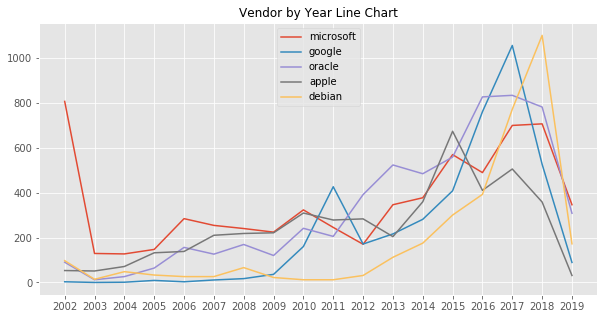

In [83]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title('Vendor by Year Line Chart',fontsize='large')
for i in top_n_vendors_dict:
    x=filename_list
    y=top_n_vendors_dict[i]
    label=i
    plt.plot_date(x,y,'-',label=label)

plt.legend()
plt.grid(True)

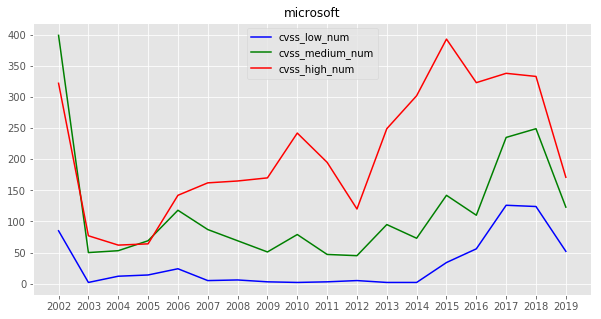

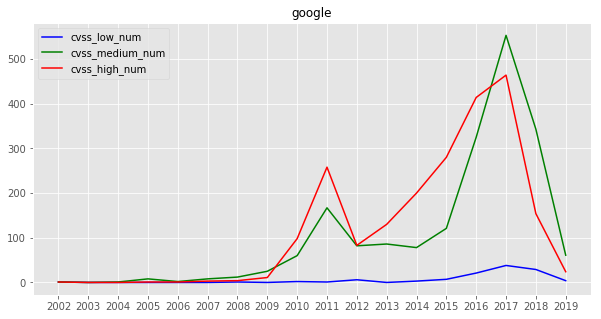

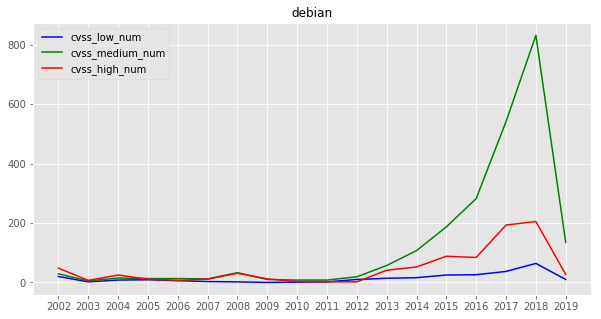

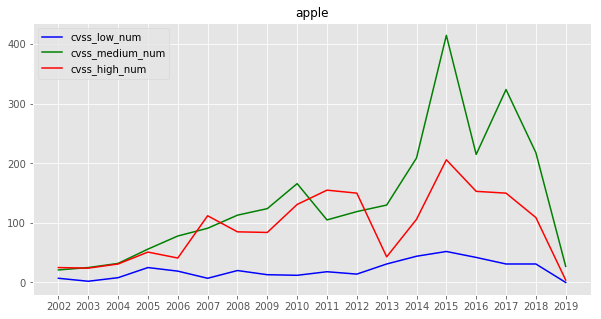

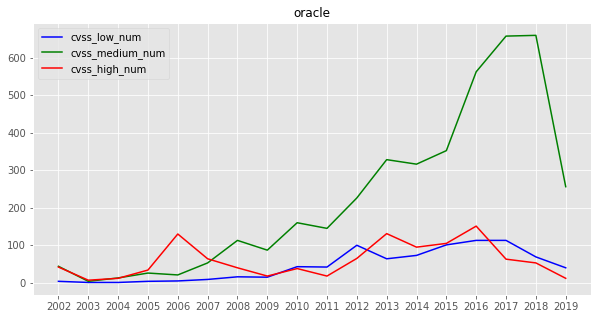

In [20]:
def draw_target_vendor_cvss(filename_list,cve_dict_list,target_vendor_name='microsoft'):
    cvss_low_num_list=[]
    cvss_medium_num_list=[]
    cvss_high_num_list=[]
    
    for cve_dict in cve_dict_list:
        cvss_low_num=0
        cvss_medium_num=0
        cvss_high_num=0
        cpe_all_num=0
        for CVE_Item in cve_dict['CVE_Items']:
            if(CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1):
                cpe_all_num=cpe_all_num+1
                vendor_list=CVE_Item['cve']['affects']['vendor']['vendor_data']
                for vendor in vendor_list:
                    if(vendor['vendor_name']==target_vendor_name):
                        if('baseMetricV2' in CVE_Item['impact']):
                            if(CVE_Item['impact']['baseMetricV2']['severity']=='HIGH'):
                                cvss_high_num=cvss_high_num+1
                            elif(CVE_Item['impact']['baseMetricV2']['severity']=='MEDIUM'):
                                cvss_medium_num=cvss_medium_num+1
                            elif(CVE_Item['impact']['baseMetricV2']['severity']=='LOW'):
                                cvss_low_num=cvss_low_num+1
                        break
        cvss_low_num_list.append(cvss_low_num)
        cvss_medium_num_list.append(cvss_medium_num)
        cvss_high_num_list.append(cvss_high_num)
        all_cvss.append(cvss_all_num)
        

    plt.style.use('ggplot')
    plt.figure(figsize=(10,5))
    plt.title(target_vendor_name,fontsize='large')
    plt.plot_date(filename_list,cvss_low_num_list,'-',label='cvss_low_num',color='blue')
    plt.plot_date(filename_list,cvss_medium_num_list,'-',label='cvss_medium_num',color='green')
    plt.plot_date(filename_list,cvss_high_num_list,'-',label='cvss_high_num',color='red')

    plt.legend()
    plt.grid(True)

draw_target_vendor_cvss(filename_list,cve_dict_list,'microsoft')
draw_target_vendor_cvss(filename_list,cve_dict_list,'google')
draw_target_vendor_cvss(filename_list,cve_dict_list,'debian')
draw_target_vendor_cvss(filename_list,cve_dict_list,'apple')
draw_target_vendor_cvss(filename_list,cve_dict_list,'oracle')

In [21]:
# import nltk
# Freq_dist_nltk=nltk.FreqDist(tokens)
# print(Freq_dist_nltk)
# for k,v in Freq_dist_nltk.items():
#     print(str(k)+":"+str(v))
# Freq_dist_nltk.plot(50,cumulative=False)


In [22]:
import nltk
import re
from nltk.corpus import stopwords
stopworddic = set(stopwords.words('english'))
stopworddic.update('[,.!\']()<>;[]{}!?/1234567890``')
stopworddic.add('``')
stopworddic.add('\'\'')

In [23]:
type(stopworddic)

set

In [24]:

documents=[]
count=0
all_words=[]
all_text_words=[]
for cve_dict in cve_dict_list:
    print(count)
    document=[]
    word=[]
    for CVE_Item in cve_dict['CVE_Items']:
        if(CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1):
            description_data=CVE_Item['cve']['description']['description_data'][0]['value']            
            text = [i for i in nltk.word_tokenize(description_data) if i not in stopworddic ]
            all_text_words.append(text)
            document.append(' '.join(text))
            word=word+text
            # print(word)
            # print(document)
            # break
    all_words.append(word)
    documents.append(document)
    count=count+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [25]:
import nltk
Freq_dist_nltk=nltk.FreqDist(all_words[0])
print(Freq_dist_nltk)
for k,v in Freq_dist_nltk.items():
    print(str(k)+":"+str(v))

<FreqDist with 15211 samples and 134001 outcomes>
ip_input.c:1
BSD-derived:1
TCP/IP:21
implementations:15
allows:5221
remote:4011
attackers:3889
cause:1402
denial:1436
service:1651
crash:362
hang:53
via:3688
crafted:26
packets:184
Buffer:1095
overflow:1151
NFS:28
mountd:1
gives:17
root:583
access:640
mostly:1
Linux:283
systems:179
Execute:1
commands:805
buffer:211
Tooltalk:1
database:118
server:825
rpc.ttdbserverd:3
MIME:38
email:118
clients:67
e.g:58
Solaris:164
mailtool:4
Outlook:57
Arbitrary:4
command:492
execution:50
IMAP:30
authenticate:26
POP:22
servers:100
based:31
BSD/Qualcomm:1
's:268
qpopper:5
gain:977
using:299
long:969
PASS:12
Information:32
SSL-encrypted:1
sessions:46
PKCS:3
#:22
NIS+:10
Sun:53
rpc.nisd:2
program:469
Inverse:1
query:58
BIND:34
4.9:3
Releases:3
Denial:68
Service:86
vulnerability:913
maliciously:2
formatted:6
DNS:103
messages:116
vulnerabilities:80
CNAME:1
record:18
zone:14
transfer:17
Some:9
web:578
Microsoft:381
Windows:494
allow:816
bypass:299
restriction

inappropriate:21
echo:11
netmask:1
timestamp:2
traceroute:10
disabled:30
xhost:4
anonymous:25
writeable:2
obtainable:1
forwards:7
external:16
claim:4
inside:4
router/firewall:1
front:3
IANA:1
private:25
10.x.x.x:1
127.x.x.x:1
217.x.x.x:1
etc:5
promiscuous:3
sniffing:30
transfers:2
queries:25
Act:1
Add:4
Workstation:2
Backup:7
Change:3
Time:3
Create:4
Pagefile:1
Permanent:1
Object:17
Token:3
Debug:1
Generate:1
Audit:1
Increase:2
Priority:1
Quota:1
Load:3
Driver:4
Lock:4
Memory:20
Profile:5
Single:1
Shutdown:2
Replace:1
Restore:5
Environment:13
Take:1
Ownership:1
Unsolicited:1
Input:4
security-critical:5
age:1
uniqueness:1
exists:13
.rhosts:1
importing:2
exporting:1
automatically:24
logs:24
upon:3
rebooting:3
obtained:7
OpenMail:1
misconfigured:1
exports:5
i.e:5
Two:3
Side:2
Include:2
SSI:11
administrators:15
require:19
become:4
piped:2
hiding:2
rpc.admind:1
secure:11
auto-indexing:1
provides:17
index.html:4
PASSFILT.DLL:1
interface:109
.reg:2
editor:12
regedit:1
Trojan:57
Horse:12
audit

VMS:4
5.3:8
ANALYZE/PROCESS_DUMP:1
dcl:1
Vermillion:1
VFTPD:1
1.23:5
rexecd:2
Tetrix:1
TetriNet:1
1.13.16:1
31457:1
Laserjet:2
JetDirect:10
cards:10
PostScript:3
9099:1
9100:1
CDomain:1
whois_raw.cgi:1
whois:4
fqdn:1
WindowMaker:4
0.52:4
0.60.0:1
Palm:7
Pilot:1
HotSync:2
3.0.4:5
14238:1
Quake:8
responds:2
initial:22
amplifier:2
style:7
MachineInfo:1
gathering:1
serving:1
PL/SQL:12
procedures:11
carbo.dll:1
iCat:1
Carbo:1
3.0.0:4
icatcommand:1
Xylogics:1
Annex:1
Architext.conf:2
world-writeable:17
obtaining:12
replaying:6
AT-generated.cgi:1
AT-admin.cgi:1
first:30
beginning:6
makes:35
easier:40
dictionary:2
Webmin:12
0.5:16
entered:7
cracking:5
dynamically:2
assigns:1
N:1
starting:11
ttdbserver:4
also:6
N-1:2
passing:6
Idle:2
idled:2
selecting:2
Log:7
Out:3
Cancel:2
dialog:7
wants:1
returns:17
programmer:1
switch:12
CMD-PWR:1
brings:1
Pro:42
initialization:5
4.3:24
attaching:4
setgid:19
rmmount:1
5.7:3
contrary:4
previous:9
mounting:4
volcheck:1
rmmount.conf:1
files.pl:1
Examples:1
Tool

Auto-update:1
transmits:2
Netbeans:2
IDE:1
Beta:15
Forte:1
Community:3
ProSoft:1
5.12:2
unprotected:3
Trend:20
Micro:20
Interscan:4
3.23/3.3:1
cgiwrap:2
3i:1
HomePagePrint:1
1.0.7:4
Windows98J:1
viewer:6
IMG_SRC:1
Messaging:12
3.54:1
3.55:2
Eicon:1
Technology:5
Diva:1
login.htm:1
rnavc:1
Knox:3
Arkeia:4
product:12
AspUpload.dll:1
Persits:1
AspUpload:2
1.4.0.2:1
.sbstart:1
AcuShop:1
Salesbuilder:1
distinguish:2
requiring:1
HTTPS:12
upgraded:1
ism.dll:2
left:2
/scripts/iisadmin:1
QPC:4
QVT/Term:2
Plus:6
4.2d:1
QVT/Net:5
shell-lock:2
Cactus:2
trivial:5
decoded:4
RPMMail:1
1.4:18
Groups:2
NLST:4
Joe:6
Own:1
Editor:4
joe:3
2.8:10
crash-save:1
DEADJOE:2
edited:5
netstation.navio-com.rte:1
1.1.0.1:1
Navio:1
NC:4
HTTP-encoded:1
hex:3
equivalent:2
SmartSwitch:1
SSR:1
8000:3
200:4
per:2
exceeding:1
craft:1
LYNXOPTIONS:1
bigconf.conf:1
F5:1
BIG/ip:1
2.1.2:6
dpsexec:1
DPS:1
XDM:2
3.2.5:2
XCmail:1
0.99.6:1
autoquote:1
/usr/sbin/Mail:1
3.3.1:4
Cheyenne:1
InocuLAN:1
EVERYONE:1
FULL:1
CONTROL:1
antivi

InvokerServlet:1
/servlet/file:1
persistent:1
Persistent:1
Mail-Browser:1
Registered:1
Dialog:1
JPEG:2
comment:4
SOCKS4:3
CONNECT:3
WDaemon:1
WircSrv:2
5.07s:2
DHTMLED:1
Explorer.exe:2
Systemdrive:1
Relative:1
1.06:3
2E:5
dots:1
GAMSoft:1
TelSrv:1
nfs-utils:1
40193:1
cvsweb:1
CVSWeb:1
1.80:1
repository:2
2.0.69:1
Jakarta:5
Tomcat:21
/admin:1
servlets:2
NBNS:1
Conflict:1
datagram:4
Spoofing:6
ftp.pl:1
Visions:1
Infopulse:1
Gatekeeper:2
4.74:1
https:1
Brown:2
Net.Data:2
db2www:2
PATH_INFO:2
5.5.x:1
6.5.3:5
Additional:1
Decryption:1
ADK:1
signed:13
1.10.8:3
Checkin.prog:2
Update.prog:2
committers:1
commit:1
.JSP:10
5.1.x:5
/ConsoleHelp/:1
invokes:7
FileServlet:1
/*.shtml/:1
SSIServlet:1
JSPServlet:1
compile:4
PageCompileServlet:1
Auction:6
Weaver:5
fromfile:2
catdir:1
Subscribe:2
LITE:3
Account:6
subscribe.pl:2
setpwd:1
amadmin.pl:1
setpasswd:1
faxrunq:1
faxrunqd:1
mgetty:4
/var/spool/fax/outgoing/.last_run:1
RealSecure:8
3.2.2:3
pgxconfig:3
GFX:3
Minicom:1
1.82.1:1
Routers:6
GSR:1
15:3
G

Vector:1
Wireless:7
Encryption:5
WEP:10
let:1
340-series:1
Aironet:3
11.01:1
24:3
WinCE:1
3.0.9348:1
Initial:4
Sequence:4
Numbers:4
ISNs:3
AP340:1
ximp40:1
arg0:2
SWF:3
3.3.3r7:2
rfbConnFailed:1
reason:1
DebugLevel:1
SGID:1
preloaded:1
/etc/ld.so.cache:1
SUID/SGID:1
/lib:1
/usr/lib:1
2.1.9x:1
RESOLV_HOST_CONF:1
HOSTALIASES:2
RES_OPTIONS:1
SlimServe:2
ReiserFS:1
3.5.28:1
qDecoder:1
CrazyWWWBoard:2
CrazySearch:1
Buster:4
8.00:1
Fasttrack:1
doroot:1
Voyant:1
Sonata:1
WebMaster:1
ConferenceRoom:1
buddy:5
clone:3
kdesu:2
KDE2:2
2.2.0-6:1
web.xml:2
Lars:1
Ellingsen:1
guestserver.cgi:1
limited-IP:1
floods:1
ip6fw:1
ECE:1
Iris:2
2.6.1:3
assignment:1
3.0.1.2.1.0:1
LocalWEB2000:3
/usr/bin/cu:1
gnuserv:1
shipped:2
XEmacs:1
MIT-MAGIC-COOKIE:1
CTRLServer:1
cfgfileget:1
domaindel:1
httpGets:1
1.1.5:6
sash:1
3.4-4:1
print_client:1
icecast:2
1.3.8beta2:1
QuickTime:3
HREF:3
SEDUM:2
HSWeb:1
/cgi/:1
browsing:2
Postaci:1
frontend:2
semicolons:1
deletecontact.php:1
Picserver:1
read-write:2
hashed:2
passphr

Q312461:1
MS01-055:1
HTTP_USER_AGENT:3
UserAgent:1
3.20:6
teTeX:1
produced:2
.dvi:1
2.2.19:14
2.4.10:2
spend:1
trying:1
CITRIX:1
Metaframe:1
helpctr.exe:1
hcp:2
Legato:5
determined:3
base-64:2
stealing:6
Packaging:1
expect:6
8.3.3:4
/home/snailtalk:1
1.5.7.2:1
rwhois:1
2.4.11pre3:1
vmlinux:1
poor:1
parallel:2
pmake:5
2.1.33:2
susehelp:1
5.50.4134.0100:1
Prompt:1
auto:1
nice:1
AND:1
4.79:3
printed:2
ndcgi.exe:1
Netdynamics:1
SPIDERSESSION:1
uniqueValue:1
4.0.2.x:1
corrupted:1
queried:2
ifx:1
Informix:4
DataBlade:3
LO:1
1.3.19:3
multiview:1
mishandled:1
mod_negotiation:1
mod_dir:1
mod_autoindex:1
body:7
permitted:3
libgtop_daemon:2
libgtop:2
1.0.12:1
syslog_message:1
syslog_io_message:1
gtop:1
Feature:1
Context:1
Based:1
Integrated:3
11.2P:1
12.2T:1
Sendpage.pl:1
Cooolsoft:4
PowerFTP:6
unrelated:1
CVE-2001-0550:1
Frox:1
transparent:1
0.6.6:1
PGPMail.pl:1
pgpuserid:1
Filename:1
UploadScript11.asp:1
DirectoryListing.asp:1
SunRPC:2
443:1
pointing:1
8.0.5:1
chgrp:1
apmscript:1
Apmd:1
Enigma:

viewcode.jse:1
Blocker:1
Clearswift:1
naming:1
libsldap:2
LDAP_OPTIONS:1
CVE-2000-1220:1
CardBoard:1
greeting:1
Michael:2
Barretto:1
snapshot:4
2001-01-18:1
2001-02-08:1
supplying:2
cgi-bin/:1
CVE-2000-0664:1
5.01w:1
tempname_ensure:1
lib/routines.h:1
a2ps:1
spy_user:1
GE:3
Healthcare:3
eNTEGRA:3
P:4
R:2
entegra:3
passme:1
Polestar/Polestar-i:1
Starlink:1
Codonics:1
insite:2
hardcoded:1
dependent:1
RFC822:1
1.2.5.1:1
1.3.25:1
smtp:1
nntp:1
preprocessor:1
4.8.2616:2
AddGame:1
1.8.7:1
PRIVMSG:2
CTCP:1
percascii:1
CGI.pl:1
2.14.1:5
reporter:2
enter_bug.cgi:1
show_bug.cgi:1
Bugs:3
pulldown:1
sql:2
boolean:1
chart:1
mybugslink:1
userprefs.cgi:1
buglist:1
long_list.cgi:1
editusers.cgi:3
blessgroupset:1
doeditvotes.cgi:1
SNMPv1:2
c06-SNMPv1:2
SPLIT:2
SNMP-related:2
accurate:3
GetRequest:1
GetNextRequest:2
SetRequest:1
URL-handling:1
4.43:1
quotes:4
6.5.15m:1
trusting:2
SIDs:2
Interix:3
Identification:3
v.:4
mshtml.dll:1
concatenated:1
believing:1
Document.open:1
MS01-058/CAN-2001-0874:1
2001B

user-specified:1
xp_execresultset:1
Origin:3
SMB_COM_TRANSACTION:1
NetShareEnum:1
NetServerEnum2:1
NetServerEnum3:1
Can:1
Lead:2
trail:1
TSAC:2
exposed:2
progressive:1
1.0.14:1
PNG:6
IDAT:1
indicated:1
IHDR:1
chunk:2
colon:3
Philip:1
Chinery:1
EMail:1
respond.pl:1
MyGuestbook:1
b2edit.showposts.php:1
B2:1
2.0.6pre2:1
b2config.php:1
b2inc:2
C-Note:1
squid_auth_LDAP:1
2.0.2:2
auth_type:1
MHonArc:3
splitting:2
pieces:1
PostCalendar:1
slrnpull:1
SLRN:1
SPOOLDIR:1
4.3.3:8
namerslv:1
dumps:3
template.dhcpo:1
LabVIEW:1
return/newline:1
CGIscript.net:4
csMailto.cgi:4
form-attachment:2
csMailto:1
form-to:1
form-from:1
form-results:1
feedback:1
k5su:3
getlogin:1
root-initiated:1
regain:1
granting:1
0.96:2
Usermin:3
0.90:2
timeouts:1
username/session:1
ifup-dhcp:1
sysconfig:1
bzip2:5
O_EXCL:1
decompresses:1
filesize:1
3.3.2a:2
plugin.php:1
PHORUM:1
settings_dir:1
successfully:4
simpleinit:2
FIFO:1
lukemftp:1
ATA:1
186:1
Telephone:1
Adaptor:1
adaptor:1
Q2:2
cvar:1
say:1
rcon_password:1
viewcvs.cgi

Weblog:3
GPC:1
tablehosts:1
2.06pre4:1
allow_fopen_url:1
6,0,47,0:1
same-domain:1
mht:1
errpt:1
scponly:1
HOME/.ssh/environment:1
sc_serv.log:1
camel:1
Ximian:1
Evolution:3
libX11.so:1
xfree86:1
5.0a:13
destined:1
new_categories:1
exploitable:1
zsh:1
graphs.php:1
Cacti:5
0.6.8:3
phpGB:3
savesettings.php:2
db4web_c:1
db4web_c.exe:1
DB4Web:3
//absolute/path:1
double-slash:1
Trillian:12
0.73:10
0.74:5
O:1
JOIN:1
221:1
206:1
211:1
213:1
214:1
215:1
217:1
218:1
243:1
317:1
324:1
332:1
333:1
352:1
367:1
PART:1
PlanetDNS:1
PlanetWeb:1
TIOCSCTTY:1
5.2.7:1
close_tunnel:1
open_tunnel:1
Lycos:1
HTMLGear:1
Aestiva:1
HTML/OS:1
JAWmail:1
1.0-rc1:1
attached:7
text/html:2
mails:1
pop-up:1
onMouseOver:1
Null:2
0.5.0:6
Not:1
Found:1
SWServer:1
FactoSystem:1
CMS:1
authornumber:1
author.asp:1
discussblurbid:1
discuss.asp:1
holdcomment.asp:2
mrinfo:1
mtrace:1
FD_SETSIZE:1
FD_SET:1
MPS:1
Enterasys:1
SSR8000:1
Smart:1
8.3.0.10:1
15077:1
15078:1
xbreaky:1
0.5.5:1
.breakyhighscores:1
AFD:1
1.2.14:1
MON_WORK_DI

checksig:1
Webresolve:1
POPROXY.EXE:1
/localhost:1
PreMasterSecret:1
Interior:1
EIGRP:2
Baby:1
OpenOffice:1
USERNAME_autoresponse.conf:1
resolving:3
combined:3
possibility:4
efficient:3
UXP/V:1
Infoblox:1
php_if_imap_mime_header_decode:1
imap_header:1
rfc822_write_address:1
Soft3304:1
04WebServer:1
WSC-WebPortal:1
setUserValue:1
sipssys/code/site.inc.php:1
20020209:1
gaining:1
chetcpasswd.cgi:1
Pedro:3
Lineu:3
Orso:3
chetcpasswd:3
CVE-2006-6639:1
isakmpd/message.c:1
isakmpd:1
isakmpd-20020403_1:1
NetScreen-Remote:1
PGPFreeware:1
7.03:1
SafeNet:1
tftpd:1
TFTP32:1
underflow:1
MailScanner:2
5-1:1
6-1:1
Sapio:1
Design:1
Ltd.:1
1.53:1
.gif:1
CVE-2002-0328:1
X-Forwarded-For:1
Enceladus:2
.\:1
/..c:1
Malicious-URL:1
member2.php:1
perpage:1
reflected:1
awp_log:1
apt-www-proxy:2
tftp32:1
com1:1
Kunani:1
Optical:1
OSM:1
7600:1
E:2
13.4:1
MyServer:1
httpd32.exe:1
VisNetic:2
3.5.15:2
KisMAC:1
0.02a:1
Akfingerd:3
refused:1
SIGPIPE:1
lose:1
administrator/phpinfo.php:1
sun.awt.windows.WDefaultFontCha

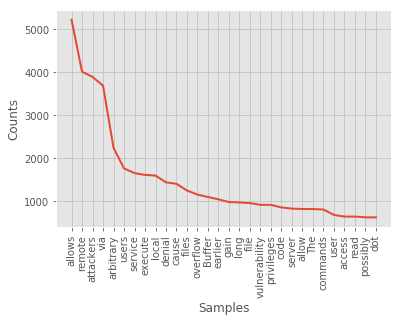

In [26]:
Freq_dist_nltk.plot(30,cumulative=False)

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

WordCloud_document=''
for wf_year_document in documents:
    for wf_document in wf_year_document:
        WordCloud_document=WordCloud_document+wf_document
# WordCloud_document




In [28]:
my_wordcloud = WordCloud(
    background_color='white',    # 设置背景颜色
    width=1000,
    height=860,
    collocations=False,
    margin=2
    ).generate(WordCloud_document)

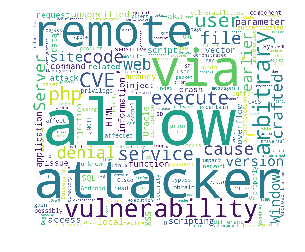

In [29]:
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
my_wordcloud.to_file('test.png')

In [30]:
# 导入库
import os
import codecs
import thulac
import re
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  
import numpy as np
from scipy import spatial
from scipy.cluster.vq import kmeans,vq,whiten

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

candidates=[[]]*len(files)

tfidf_document=[]
for tfidf_year_document in documents:
    tfidf_document=tfidf_document+tfidf_year_document

# WordCloud_document




In [32]:
tfidf_document[:10]

['ip_input.c BSD-derived TCP/IP implementations allows remote attackers cause denial service crash hang via crafted packets',
 'Buffer overflow NFS mountd gives root access remote attackers mostly Linux systems',
 'Execute commands root via buffer overflow Tooltalk database server rpc.ttdbserverd',
 'MIME buffer overflow email clients e.g Solaris mailtool Outlook',
 'Arbitrary command execution via IMAP buffer overflow authenticate command',
 "Buffer overflow POP servers based BSD/Qualcomm 's qpopper allows remote attackers gain root access using long PASS command",
 'Information SSL-encrypted sessions via PKCS #',
 "Buffer overflow NIS+ Sun 's rpc.nisd program",
 'Inverse query buffer overflow BIND 4.9 BIND Releases',
 'Denial Service vulnerability BIND Releases via maliciously formatted DNS messages']

In [33]:
all_text_words[:10]

[['ip_input.c',
  'BSD-derived',
  'TCP/IP',
  'implementations',
  'allows',
  'remote',
  'attackers',
  'cause',
  'denial',
  'service',
  'crash',
  'hang',
  'via',
  'crafted',
  'packets'],
 ['Buffer',
  'overflow',
  'NFS',
  'mountd',
  'gives',
  'root',
  'access',
  'remote',
  'attackers',
  'mostly',
  'Linux',
  'systems'],
 ['Execute',
  'commands',
  'root',
  'via',
  'buffer',
  'overflow',
  'Tooltalk',
  'database',
  'server',
  'rpc.ttdbserverd'],
 ['MIME',
  'buffer',
  'overflow',
  'email',
  'clients',
  'e.g',
  'Solaris',
  'mailtool',
  'Outlook'],
 ['Arbitrary',
  'command',
  'execution',
  'via',
  'IMAP',
  'buffer',
  'overflow',
  'authenticate',
  'command'],
 ['Buffer',
  'overflow',
  'POP',
  'servers',
  'based',
  'BSD/Qualcomm',
  "'s",
  'qpopper',
  'allows',
  'remote',
  'attackers',
  'gain',
  'root',
  'access',
  'using',
  'long',
  'PASS',
  'command'],
 ['Information', 'SSL-encrypted', 'sessions', 'via', 'PKCS', '#'],
 ['Buffer', '

In [34]:
# 计算tf、tfidf

vectorizer=CountVectorizer(min_df=5,stop_words=stopworddic)#定义计数器  
transformer=TfidfTransformer()#该类会统计每个词语的tf-idf权值

tf=vectorizer.fit_transform(tfidf_document) #计算TF
tfidf=transformer.fit_transform(tf)#fit_transform计算tf-idf，fit_transform将文本转为词频矩阵 
word=vectorizer.get_feature_names()#获取词袋模型中的所有词语  
tfidfmat=tfidf.toarray()
tfmat=tf.toarray()

In [35]:
len(tfidfmat[1])

19255

In [36]:
tf

<117210x19255 sparse matrix of type '<class 'numpy.int64'>'
	with 2783990 stored elements in Compressed Sparse Row format>

In [37]:
len(all_text_words)

117210

In [38]:
# step 2

## TFIDF
K=5
statistic={}
keywords=[]
count=0
for n in range(1000):
    data=[(w,tfidfmat[n,word.index(w)]) for w in all_text_words[n] if w in word]
    data.sort(key=lambda x:x[1],reverse=True) 
    keywords.append([w for w in data[:K]])
    print(count)
    count=count+1
    # print("keywords {}".format([w for w in data[:K]]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [39]:
keywords[:10]

[[('implementations', 0.3909136932441062),
  ('hang', 0.2980488392244995),
  ('packets', 0.2725756794975472),
  ('crash', 0.17905896567702625),
  ('crafted', 0.14122140992909427)],
 [('mostly', 0.4987712420152149),
  ('mountd', 0.4603291027978446),
  ('gives', 0.4143567768518227),
  ('systems', 0.26648114547023494),
  ('root', 0.22538946355222578)],
 [('database', 0.3174583219368015),
  ('root', 0.305774433823455),
  ('commands', 0.2207465122703615),
  ('overflow', 0.21687798410834025),
  ('buffer', 0.2114046346952224)],
 [('clients', 0.42760484743965843),
  ('email', 0.3681306894517469),
  ('overflow', 0.22246064331446863),
  ('buffer', 0.21684640433796276)],
 [('command', 0.5975783273966632),
  ('command', 0.5975783273966632),
  ('authenticate', 0.46763507629257484),
  ('execution', 0.28262260250884064),
  ('overflow', 0.22407256203900974)],
 [('qpopper', 0.4422410230038073),
  ('root', 0.21786732455644103),
  ('servers', 0.2070463515780483),
  ('command', 0.20605471667456376),
  ('l

In [40]:
np.shape(tfidfmat)[0]

117210

[('allows', 0.3958402132028613), ('via', 0.30894845908516005), ('remote', 0.2747824565147639), ('attackers', 0.2606752623531038), ('arbitrary', 0.16486947390885834), ('users', 0.15447422954258003), ('local', 0.14481959019616877), ('attacker', 0.11957600136213876), ('service', 0.11907239782306435), ('execute', 0.11907239782306435)]
[('allows', 0.3066175652455298), ('server', 0.28362124785211507), ('attackers', 0.25295949132756207), ('remote', 0.22543971415685898), ('via', 0.21463229567187087), ('arbitrary', 0.1309004791878536), ('users', 0.10731614783593543), ('files', 0.0996507087047972), ('access', 0.0996507087047972), ('local', 0.09198526957365895)]
[('allows', 0.26067597452687963), ('attackers', 0.2243025827324313), ('remote', 0.19554339863335576), ('vulnerability', 0.187929190937983), ('unknown', 0.18533800831767394), ('via', 0.1758047270065002), ('related', 0.09955139093316177), ('arbitrary', 0.09777169931667788), ('execute', 0.09202042288628506), ('users', 0.0848712475203794)]
[(

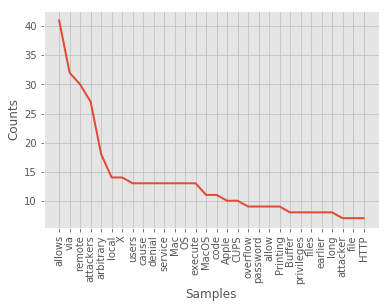

2003


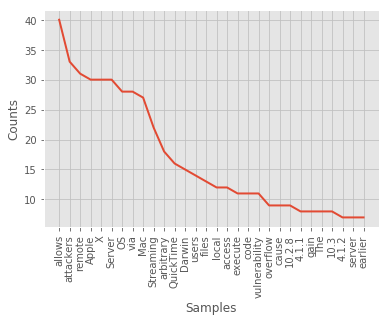

2004


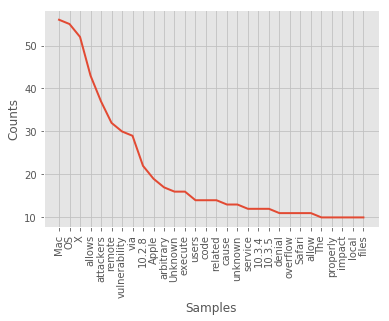

2005


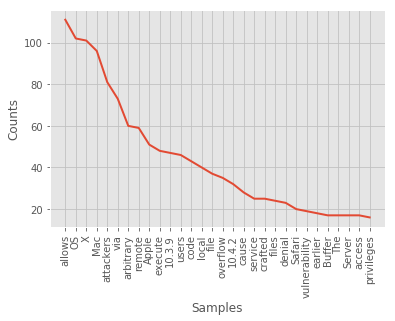

2006


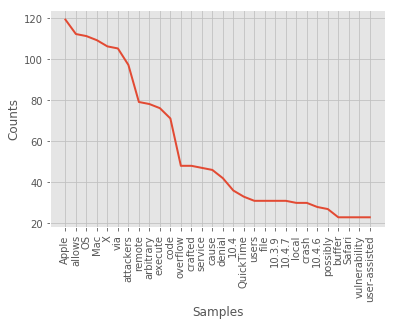

2007


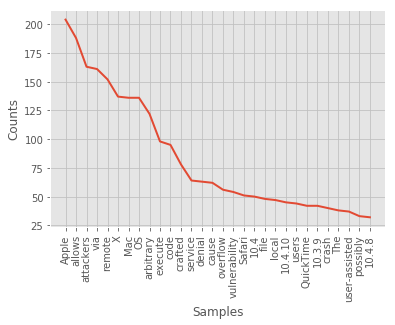

2008


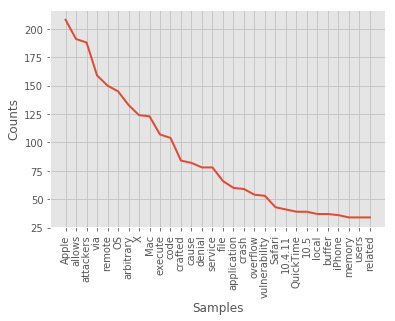

2009


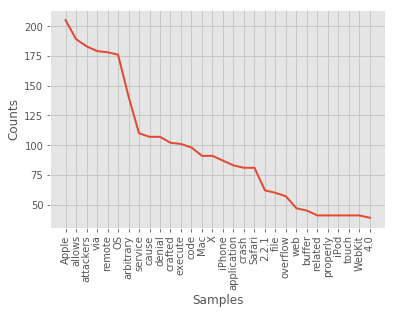

2010


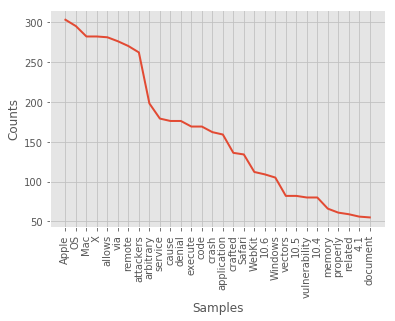

2011


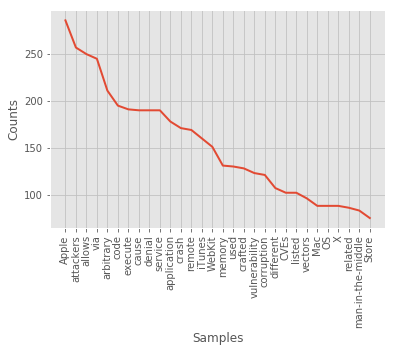

2012


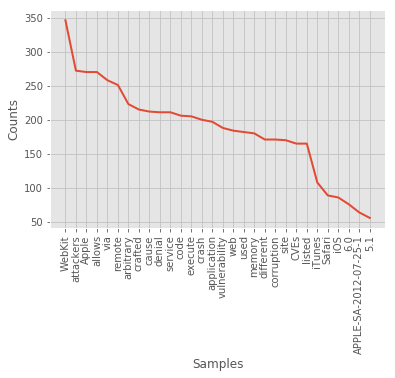

2013


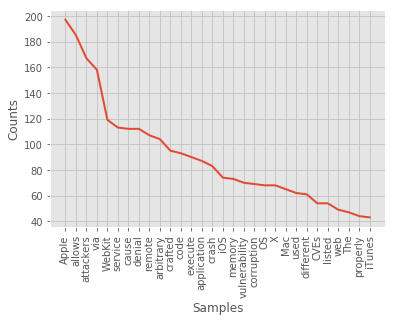

2014


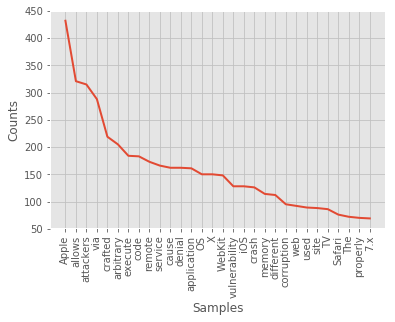

2015


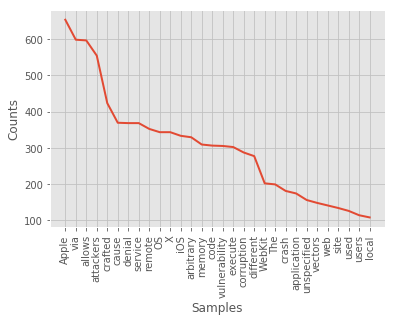

2016


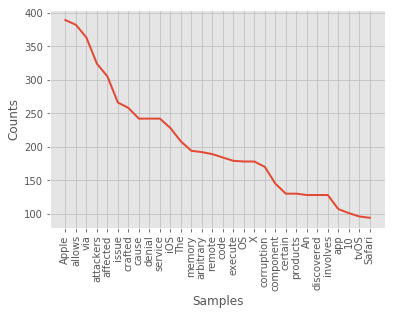

2017


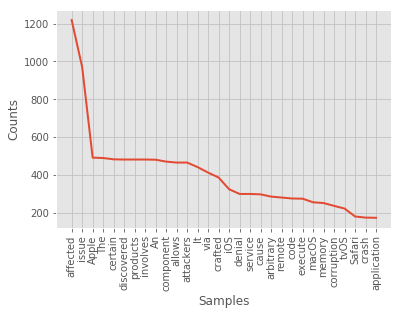

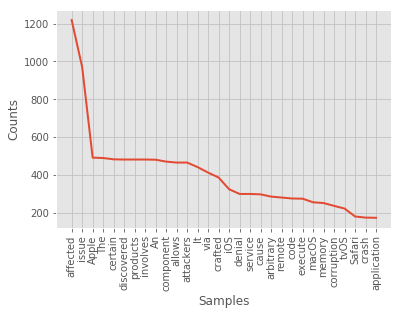

In [86]:
import nltk
def draw_target_vendor_descript(filename_list,cve_dict_list,stop_words=stopworddic,target_vendor_name='microsoft'):
    tfidf_document=[]
    all_text_words=[]
    for cve_dict in cve_dict_list:
        year__text_words=[]
        year_tfidf_document=''
        for CVE_Item in cve_dict['CVE_Items']:
            if(CVE_Item['cve']['description']['description_data'][0]['value'].find('** REJECT **')==-1):
                vendor_list=CVE_Item['cve']['affects']['vendor']['vendor_data']
                for vendor in vendor_list:
                    if(vendor['vendor_name']==target_vendor_name):
                        content_data=CVE_Item['cve']['description']['description_data'][0]['value']
                        text = [i for i in nltk.word_tokenize(content_data) if i not in stopworddic ]
                        year__text_words=year__text_words+text
                        year_tfidf_document=year_tfidf_document+' '+content_data
        tfidf_document.append(year_tfidf_document)
        all_text_words.append(year__text_words)
    
    #print(tfidf_document[:10])
    # 计算tf、tfidf

    vectorizer=CountVectorizer(min_df=5,stop_words=stopworddic)#定义计数器  
    transformer=TfidfTransformer()#该类会统计每个词语的tf-idf权值

    tf=vectorizer.fit_transform(tfidf_document) #计算TF
    tfidf=transformer.fit_transform(tf)#fit_transform计算tf-idf，fit_transform将文本转为词频矩阵 
    word=vectorizer.get_feature_names()#获取词袋模型中的所有词语  
    tfidfmat=tfidf.toarray()
    tfmat=tf.toarray()

    ## TFIDF
    K=10
    statistic={}
    keywords=[]
    count=0
    for n in range(len(all_text_words)):
        data=[(w,tfidfmat[n,word.index(w)]) for w in all_text_words[n] if w in word]
        # print(data[:10])
        data=list(set(data))
        # print(data[:10])
        data.sort(key=lambda x:x[1],reverse=True) 
        # print(data[:10])

        keywords.append([w for w in data[:K]])
        #print(count)
        count=count+1
        #print("keywords {}".format([w for w in data[:K]]))
    count=0
    for i in keywords:
        print(i)
        

    # Freq_dist_nltk=nltk.FreqDist(all_text_words[10])

    
    for i in range(16):
        print(i+2002)
        Freq_dist_nltk=nltk.FreqDist(all_text_words[i])
        Freq_dist_nltk.plot(30,cumulative=False)
    # print(Freq_dist_nltk)
#     for k,v in Freq_dist_nltk.items():
#         print(str(k)+":"+str(v))
    Freq_dist_nltk.plot(30,cumulative=False)
#         count=count+1
#         if(count>10):
#             break
    return 

draw_target_vendor_descript(filename_list,cve_dict_list,stopworddic,'apple')


[('oracle', 0.47739325959524176), ('allows', 0.30569919254783023), ('attackers', 0.27367266990238936), ('9i', 0.2614260171516476), ('remote', 0.25544727048517324), ('via', 0.25544727048517324), ('server', 0.18844470773496386), ('arbitrary', 0.16332078687723234), ('execute', 0.1423804458441949), ('application', 0.13400512550041874)]
[('oracle', 0.4391600878329293), ('9i', 0.2836112767982065), ('long', 0.27148630218516784), ('database', 0.21958004391646466), ('release', 0.21631100905809156), ('arbitrary', 0.20830691406368976), ('buffer', 0.18516170138994642), ('execute', 0.17566403513317172), ('via', 0.15370603074152528), ('code', 0.15370603074152528)]
[('9i', 0.35790316348751744), ('10g', 0.3322741668304599), ('allows', 0.21741611402468589), ('remote', 0.21741611402468589), ('execute', 0.2046269308467632), ('attackers', 0.202209881620043), ('via', 0.19183774766884049), ('arbitrary', 0.1887292228453735), ('users', 0.1617679052960344), ('allow', 0.12132592897202582)]
[('server', 0.2646278

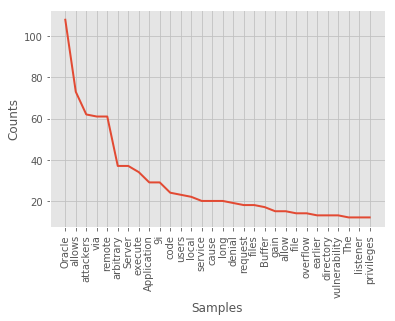

2003


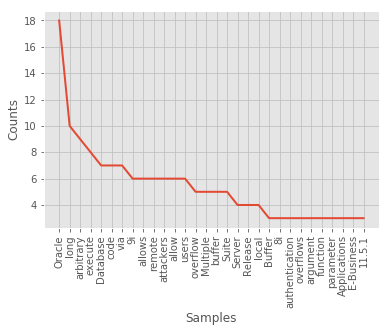

2004


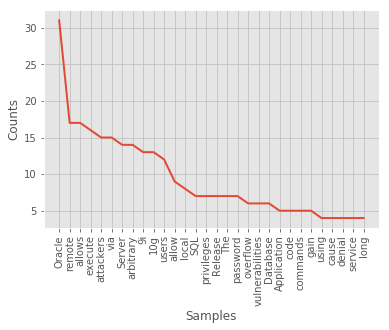

2005


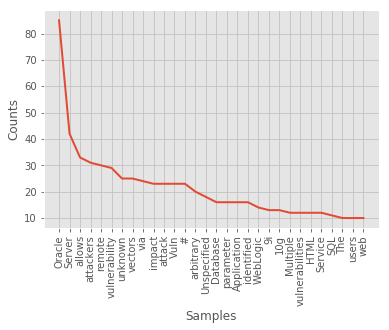

2006


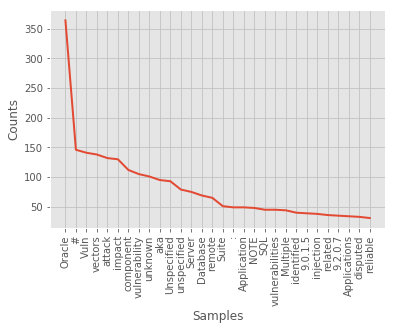

2007


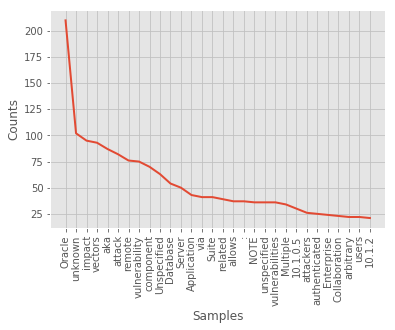

2008


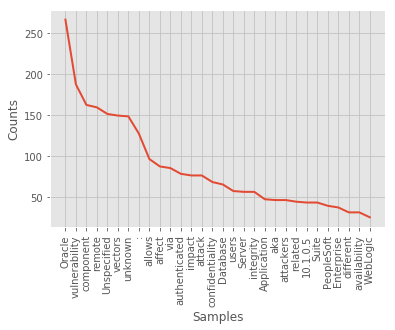

2009


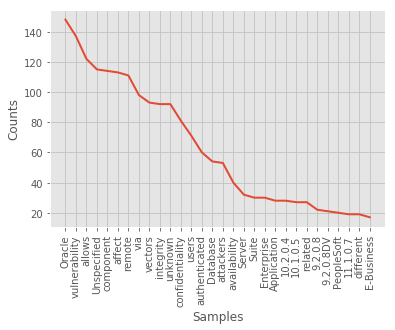

2010


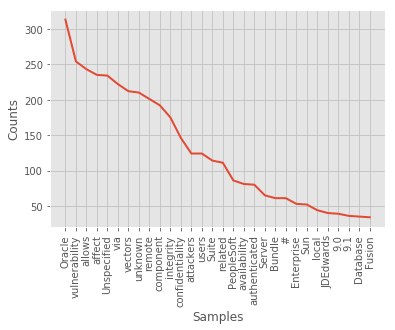

2011


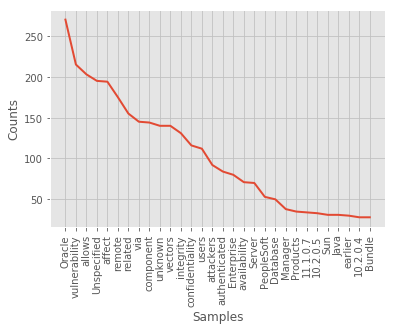

2012


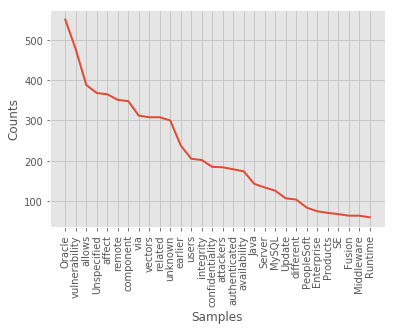

2013


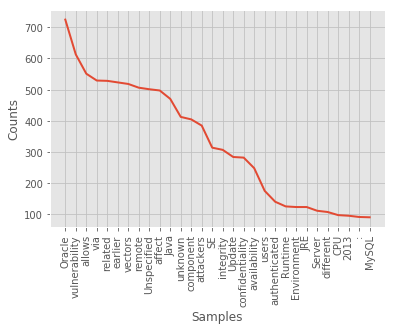

2014


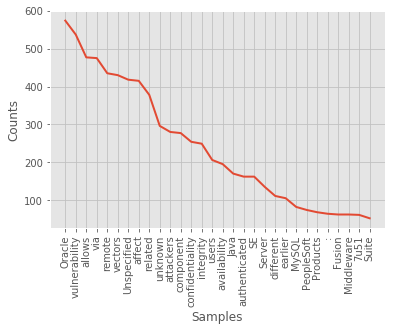

2015


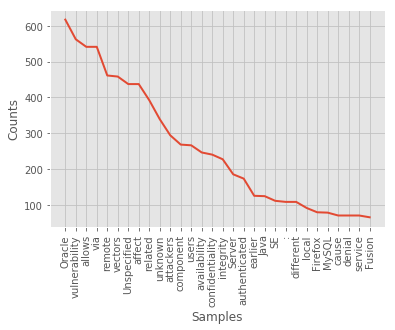

2016


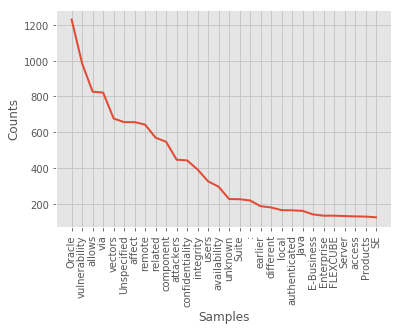

2017


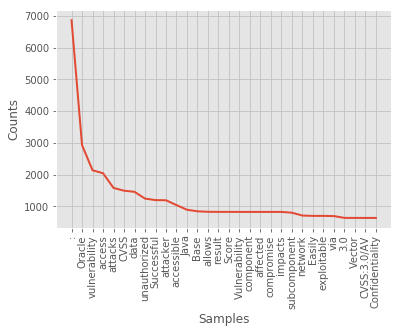

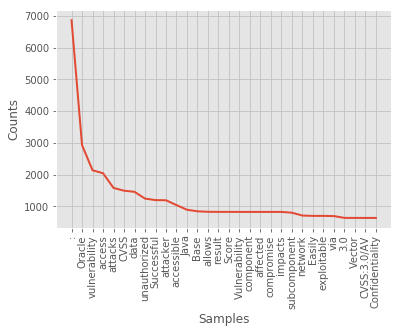

In [84]:
draw_target_vendor_descript(filename_list,cve_dict_list,stopworddic,'oracle')